In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

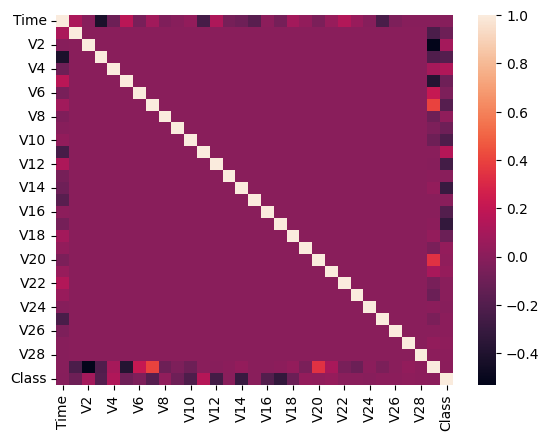

In [6]:
corr = df.corr()
sns.heatmap(corr, annot=False)
plt.show()

In [7]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
fraud = df[df['Class'] == 1]
safe = df[df['Class'] == 0]
print('The number of fraud transactions are {}'.format(fraud.shape[0]))
print('The number of safe transactions are {}'.format(safe.shape[0]))

The number of fraud transactions are 492
The number of safe transactions are 284315


In [9]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df.shape

(284807, 31)

# Firstly checked the model with this unbalanced dataset.

1.Train-Test Split

In [11]:
X = df.drop(["Class"],axis =1)
y = df["Class"]
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2)

2.Fit the model

In [12]:
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

3.Check the model accuracy,precision,recall,f1-score

In [13]:
pred = model.predict(X_test)

In [14]:
acc1 = model.score(X_test,y_test)

In [15]:
acc_lr  = round(acc1 * 100, 2)
acc_lr

99.88

In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56853
           1       0.73      0.59      0.65       109

    accuracy                           1.00     56962
   macro avg       0.86      0.79      0.82     56962
weighted avg       1.00      1.00      1.00     56962



In logistic regression we got 99.88% accuracy in imbalanaced data set .So we checked why we need to convert the imbalanced dataset into balanaced dataset with the help of confusion matrix.

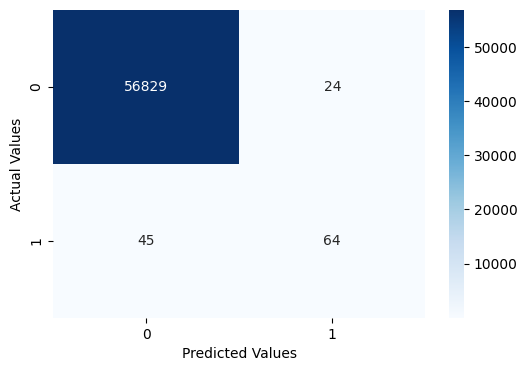

In [17]:
cm = metrics.confusion_matrix(y_test, pred)

plt.figure(figsize=(6, 4))  
sns.heatmap(cm, annot=True, cmap='Blues' ,fmt='d')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

> Out of 109 fraud transactions, 45 were mistakenly classified as legal (False Negatives), whereas only 24 out of 56,853 legal transactions were incorrectly labeled as fraud (False Positives). This indicates that the model accurately identified only 64 out of the 109 fraud cases (58.7%), while accurately classifying 56,829 out of 56,853 legal cases (99.95%). Essentially, the model excels at predicting legal transactions but falls short in detecting fraud. Therefore, the reported 99.88% accuracy primarily reflects its proficiency in predicting legal transactions rather than effectively identifying fraud – which is the primary objective.

# Then balanaced the datset and train the model

In [18]:
df2 = pd.concat([X_train, y_train], axis=1)
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
183026,125624.0,1.871748,-1.365499,-1.125236,-0.877034,-0.794966,-0.421704,-0.535110,-0.151618,-0.421059,...,0.287222,0.524100,-0.032477,-0.452490,-0.137267,-0.211170,-0.041087,-0.039997,169.70,0
40673,40346.0,1.173212,-0.301503,-0.037885,0.356057,0.042944,0.691171,-0.320703,0.315731,0.570721,...,-0.236422,-0.652011,-0.114202,-1.159818,0.410422,0.462619,-0.036898,-0.012928,36.94,0
198019,132288.0,0.866778,-1.250034,-3.078711,1.438415,-0.331943,-2.324625,1.353580,-0.653211,0.167771,...,0.282791,-0.391913,-0.369207,0.721388,-0.271382,0.578720,-0.177780,0.108335,595.00,0
186580,127167.0,-0.279824,0.958658,1.047179,0.976920,0.570416,-0.452965,0.879077,-0.166203,-0.615899,...,0.190475,0.698901,-0.234059,0.009761,-0.039956,-0.441794,0.193951,0.168770,17.91,0
251599,155413.0,2.220957,-2.020610,0.435284,-1.271311,-1.975225,1.268302,-2.487718,0.376782,0.475245,...,-0.116638,0.644321,0.135337,0.095332,-0.198543,0.030381,0.121629,-0.026381,11.12,0


In [19]:
legal_data = df2[df2.Class == 0]
fraud_data = df2[df2.Class == 1]

1.Under-sampling the dataset

In [20]:
print(legal_data.shape, fraud_data.shape)

(227462, 31) (383, 31)



> There is 227451 legal data and 394 fraud data. So we choose randomely 394 data out of 227451 legal data for balancing the dataset.This process is called Under_sampling.


In [21]:
legal_data = legal_data.sample(n=394)
legal_data.shape

(394, 31)

2.Create new balanced dataset

In [22]:
df2 = pd.concat([legal_data, fraud_data], axis=0)
df2.shape

(777, 31)

# Then this balanaced dataset is fit in the model

In [23]:
X = df2.drop(["Class"],axis =1)
y = df2["Class"]
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size = 0.2)

2.Fit the model

In [24]:
model = linear_model.LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
pred = model.predict(X_test)

In [26]:
acc2 = model.score(X_test,y_test)

In [27]:
acc_lr  = round(acc2 * 100, 2)
acc_lr

94.87

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        80
           1       0.97      0.92      0.95        76

    accuracy                           0.95       156
   macro avg       0.95      0.95      0.95       156
weighted avg       0.95      0.95      0.95       156

